In [5]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [6]:
data = pd.read_csv(
    r'C:\Users\Barbara\Desktop\Estudos\Infnet\Data_Science\7-Redes_Neurais\Projeto\Data_Preparation\data\processed\branco.csv')
data.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,opinion
0,1,7.0,0.27,0.36,4.549725,0.212132,3.806662,5.135798,1.0010,3.00,0.45,8.8,1
1,1,6.3,0.30,0.34,1.264911,0.221359,2.639057,4.882802,0.9940,3.30,0.49,9.5,1
2,1,8.1,0.28,0.40,2.626785,0.223607,3.401197,4.574711,0.9951,3.26,0.44,10.1,1
3,1,7.2,0.23,0.32,2.915476,0.240832,3.850148,5.225747,0.9956,3.19,0.40,9.9,1
4,1,7.2,0.23,0.32,2.915476,0.240832,3.850148,5.225747,0.9956,3.19,0.40,9.9,1


In [7]:
data.drop(columns=['type'], inplace=True)

In [31]:
target = 'opinion'
x = data.drop(columns=[target])
y = data[[target]]

In [32]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, stratify=y)
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.3, stratify=y_train)

In [33]:
props = pd.DataFrame(data[target].value_counts(normalize=True).values,
                     index=data[target].value_counts(normalize=True).index,
                     columns=['original'])
props['treino'] = y_train[target].value_counts(normalize=True).values
props['val'] = y_val[target].value_counts(normalize=True).values
props['teste'] = y_test[target].value_counts(normalize=True).values
props

,original,treino,val,teste
opinion,,,,
1,0.667765,0.667788,0.667647,0.667811
0,0.332235,0.332212,0.332353,0.332189


In [34]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_norm = scaler.transform(x_train)
x_val_norm = scaler.transform(x_val)
x_test_norm = scaler.transform(x_test)

In [35]:
random.seed()

def create_ann_model(x, n_neurons: list):
  model = Sequential()
  if len(n_neurons) == 1:
    model.add(Dense(n_neurons[0], input_shape=(11,), activation='relu')) 

  model.add(Dense(1, activation='sigmoid')) 

  return model

In [37]:
model = create_ann_model(x_train_norm, n_neurons=[11])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 11)                132       
                                                                 
 dense_7 (Dense)             (None, 1)                 12        


                                                                 
Total params: 144 (576.00 Byte)
Trainable params: 144 (576.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='Recall')

history = model.fit(x_train_norm, y_train, epochs=100,
                    batch_size=1200, validation_data=(x_val_norm, y_val))

Epoch 1/100
2/2 [==============================] - 1s 174ms/step - loss: 0.8152 - recall: 0.4509 - val_loss: 0.8061 - val_recall: 0.4728
Epoch 2/100
2/2 [==============================] - 0s 33ms/step - loss: 0.8087 - recall: 0.4591 - val_loss: 0.8001 - val_recall: 0.4802
Epoch 3/100
2/2 [==============================] - 0s 30ms/step - loss: 0.8023 - recall: 0.4610 - val_loss: 0.7942 - val_recall: 0.4787
Epoch 4/100
2/2 [==============================] - 0s 53ms/step - loss: 0.7960 - recall: 0.4647 - val_loss: 0.7884 - val_recall: 0.4846
Epoch 5/100
2/2 [==============================] - 0s 35ms/step - loss: 0.7899 - recall: 0.4685 - val_loss: 0.7827 - val_recall: 0.4963
Epoch 6/100
2/2 [==============================] - 0s 35ms/step - loss: 0.7840 - recall: 0.4717 - val_loss: 0.7772 - val_recall: 0.4978
Epoch 7/100
2/2 [==============================] - 0s 31ms/step - loss: 0.7780 - recall: 0.4780 - val_loss: 0.7718 - val_recall: 0.5022
Epoch 8/100
2/2 [==============================

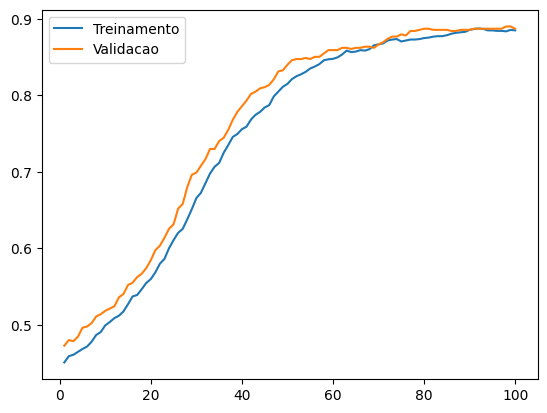

In [39]:
plt.plot(range(1, 101), history.history['recall'], label="Treinamento")
plt.plot(range(1, 101), history.history['val_recall'], label="Validacao")
plt.legend(loc='best')

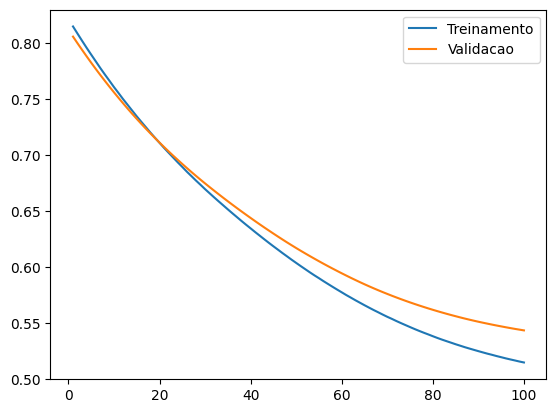

In [40]:
plt.plot(range(1, 101), history.history['loss'], label="Treinamento")
plt.plot(range(1, 101), history.history['val_loss'], label="Validacao")
plt.legend(loc='best')

In [41]:
yhat_test = model.predict(x_test_norm)
yhat_test_class = [1 if x > 0.5 else 0 for x in yhat_test]
print(classification_report(y_test, yhat_test_class))

46/46 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.66      0.48      0.55       484
           1       0.77      0.88      0.82       973

    accuracy                           0.75      1457
   macro avg       0.72      0.68      0.69      1457
weighted avg       0.74      0.75      0.73      1457



In [43]:
yhat_hist_train = model.predict(x_train_norm)
yhat_hist_test = model.predict(x_test_norm)

46/46 [==============================] - 0s 981us/step


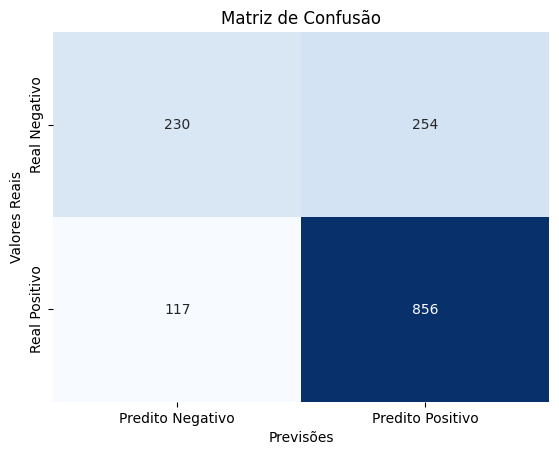

In [44]:
conf = confusion_matrix(y_test, yhat_test_class)
import seaborn as sns
sns.heatmap(conf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predito Negativo', 'Predito Positivo'],
            yticklabels=['Real Negativo', 'Real Positivo'])

plt.xlabel("Previsões")
plt.ylabel("Valores Reais")
plt.title("Matriz de Confusão")
plt.show()

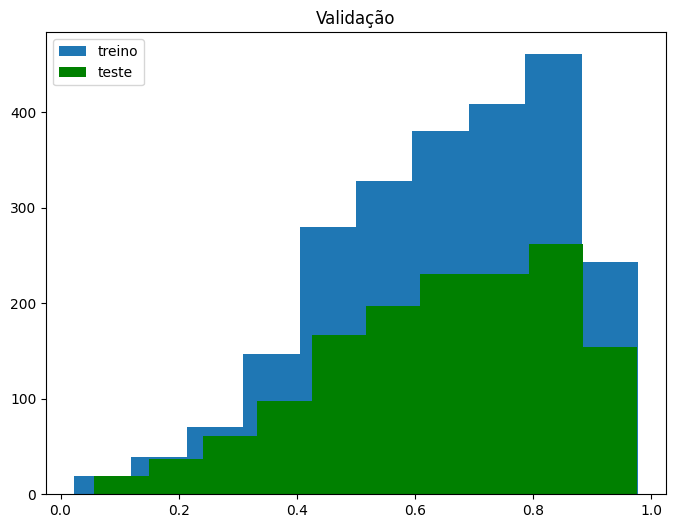

In [47]:
plt.figure(figsize=(8,6))
plt.title('Validação')
plt.hist(yhat_hist_train, label='treino')
plt.hist(yhat_hist_test, color='green', label='teste')
plt.legend()
plt.show()